# Social Data Mining 2017 (Spring) - Practical 1: Know your Data

In this session you are going to use the **Titanic: Machine Learning from Disaster** dataset.

- Information: [task](https://www.kaggle.com/c/titanic), [data](https://www.kaggle.com/c/titanic/data)
- Data: [link](https://raw.githubusercontent.com/tcsai/social-data-mining/master/data/titanic.csv)

Please make sure you understand the dataset and the task before beginning. In this practical we will focus on **exploratory dataset analysis** - an important first step before engaging in any Data Mining activities. We want get to know our data: find interesting observations, anomalies in data, and think about how to best go about solving the task. 

In [1]:
from IPython.display import Image

## !!! Important Practical Note !!!

If you cannot answer a task during the practicals fully, or feel unsure about your answer (even after the explanation), **please ask**! It is very important that you develop the correct intuitions for each of the points we discuss here. Sometimes they just don't 'click' by themselves; they require a lot of repeated practice and interpretation, and not every explanation works for everyone.

We will be very happy to answer all your questions on the **Discussion Board** or during class!

---

![imgacdc](http://media-cache-ec0.pinimg.com/736x/c0/a7/58/c0a758f3c76d5019c774af8bb90ed434.jpg)

## 0 - Quick Refresher on Instances, Features, and Vectors

Data Mining, Machine Learning, and all related fields have a special way of naming certain things related to data that are important to know by heart. This refresher will give you a short overview.

Say we have a table (our data) describing ticket sales for concerts. See a small example below.

| customer_id | customer_gender | customer_age | ticket_price | concert      | genre        |
| ----------- | --------------- | ------------ | ------------ | ------------ | ------------ |
| 01          | f               | 21           | 40           | AC/DC        | hard rock    |
| 07          | m               | 45           | 75           | Ed Sheeran   | acoustic     |
| 11          | m               | 30           | 64           | Depeche Mode | electronic   |
| 05          | f               | 14           | 54           | Hans Zimmer  | instrumental |

Each line (or row) of data is what we call an **instance**. An **instance** usually refers to something concrete: a person, an animal, a song, a document, or in this case: a ticket. Instances are described by **features** (better known as variables, or attributes), they tell you some (hopefully) characteristic information about these instances.

Instances can be represented mathematically as a **feature vector**. For the first instance above, this would be noted as:

$\vec{x}_1 = \langle 01, \text{f}, 21, 40, \text{AC/DC}, \text{hard rock} \rangle$

Where $\vec{x}$ is the vector, and subscript 1 the index.

### Interpreting Features: Numeric / Continuous vs Nominal / Discrete 

This doesn't fully work, however. In general, we want to be able to do calculations with these data. As such, features with what we call **strings** (letters) cannot be used in their raw form (e.g. `f`, `AC/DC`). For the sake of simplicity, we will get rid of the `concert` and `genre` features for this example. The gender variable can be recoded to 0 for f and 1 for m. So, we will get:

$\vec{x}_1 = \langle 01, 0, 21, 40 \rangle$

Now, the remaining 4 features also require a bit of interpretation. We distinguish between **numeric** (**continuous**) features and **nominal** (**discrete**) features. **Numeric** features are [real valued](en.wikipedia.org/wiki/Real_number) (range between -infinity and +infinity), whereas **nominal** features are finite, and are usually associated with some label. In our example, `id`, `age` and `price` are all *considered* numeric (technically, age is discrete). Gender is a typical discrete variable: we have `0 = f` and `1 = m`.

### Feature Spaces

The beauty of using this numeric notation is that each instance can be represented as a point in a space (or $n$-dimensional graph). So say that we plot the `age` on the $x$ and `price` on the $y$-axis for our first 2 instances, our **feature space** as this is called, will look like:

            70|          x (75, 45)
              |
       price  |    x (21, 40)
              |
              |____________ 
             0     age   50

This is a 2-dimensional space (with 2 axes). A bit more fancier 3-d space can be seen below. However, we have 4 features - so this would have to be plotted in a 4-dimensional space. Unfortunately, we as humans can only see as much as 3-dimensions, so there's no way to show you how our actual feature space would look like (even colours and shapes will only get us so far). Luckily however, mathematical functions _can_ handle this!

![imgspace](https://www.projectrhea.org/rhea/images/thumb/2/22/Hyperplane.png/700px-Hyperplane.png)


---

## 1 - Interpreting Raw Data

Your first step as a data scientist is (as frequently repeated in the lecture) to *know* your data. Everyone can learn to fire up a program and click a few buttons. It is *your* task, however, to understand this data and generate creative insights and be able to communicate these (in the form of a scientific paper or business presentation). It is therefore important to know the possibilities and limitations of your data.

![imgorange](http://orange.biolab.si/static/images/orange_title_scaled.png)

Open `Orange`, and start off by dragging the [`File` widget](http://docs.orange.biolab.si/3/visual-programming/widgets/data/file.html) onto the workspace. Double clicking on the widget allows you to a) open up a dataset you have saved on your system, or b) load it from a URL. We will do the latter. Copy the data link above and insert it in the URL box, click `Reload`. You will be presented with an overview of the amount of instances, features, and meta-data.


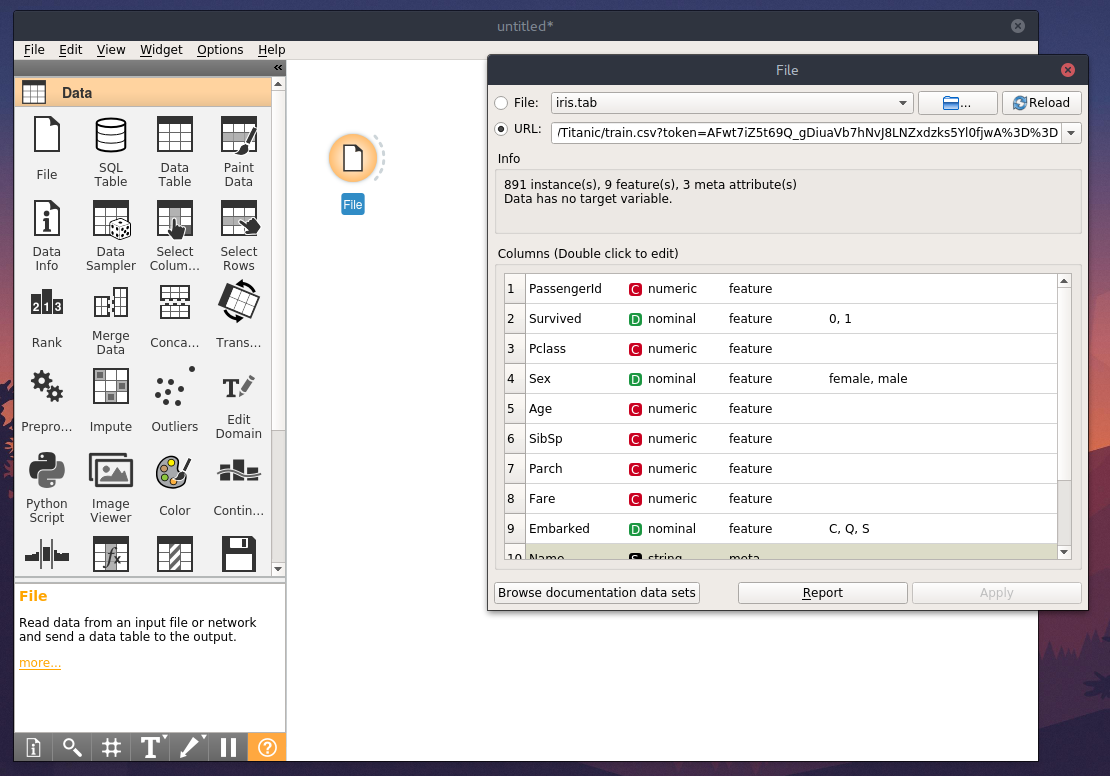

In [2]:
Image('./pic/orange_file.png')

If we take a quick peek at the [wiki](https://en.wikipedia.org/wiki/RMS_Titanic), we get some rough numbers for comparison:

> Titanic had around 885 crew members on board for her maiden voyage.[95] Like other vessels of her time, she did not have a permanent crew, and the vast majority of crew members were casual workers who only came aboard the ship a few hours before she sailed from Southampton.[96]

> Titanic's passengers numbered approximately 1,317 people: 324 in First Class, 284 in Second Class, and 709 in Third Class. Of these, 869 (66%) were male and 447 (34%) female. There were 107 children aboard, the largest number of which were in Third Class.[105] The ship was considerably under capacity on her maiden voyage, as she could accommodate 2,453 passengers—833 First Class, 614 Second Class, and 1,006 Third Class.

### Tasks

1. How much of the data are we missing?

2. One of the features is assigned the wrong type (numeric / nominal). Use the dataset information to determine the feature and correct it.

3. Use the [`Data Tables` widget](http://docs.orange.biolab.si/3/visual-programming/widgets/data/datatable.html) to inspect the raw data. Can you find a reason why Orange incorrectly interpreted the type?

4. Which information could we use to determine the crew of the Titanic in this dataset?

5. Use the [`Edit Domain` widget](http://docs.orange.biolab.si/3/visual-programming/widgets/data/editdomain.html) and the dataset information to correctly code the incorrect variable. Also change the `survived` variable to the actual values (`survived`, `deceased`). Don't forget to click **Apply**!

Your workspace should look like this:

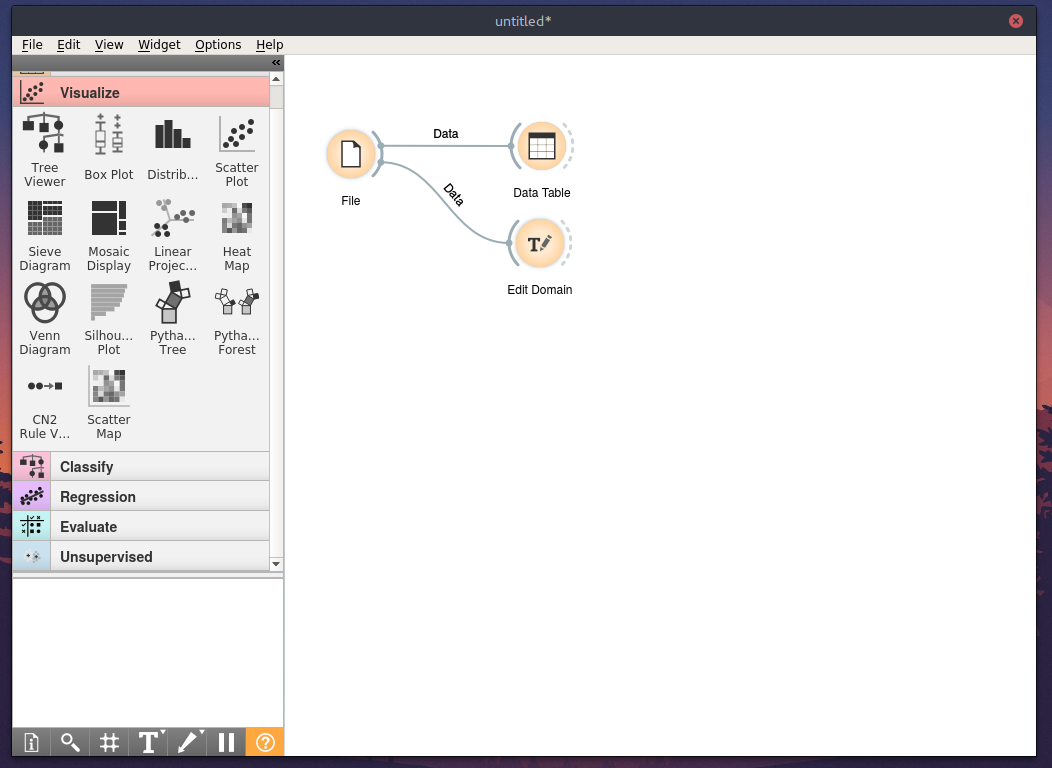

In [3]:
Image('./pic/orange_dat.png')

---

![imgxkcd](https://imgs.xkcd.com/comics/decline.png)


## 2 - Visualizing Data

Orange works as a 'flow'. You connect the output of certain components to the input of other components. Once the data is filtered, you can connect the output of `Edit Domain` to any of the widgets under `Visualize` (see screenshot above). We'll first look at the [`Distributions` widget](http://docs.orange.biolab.si/3/visual-programming/widgets/visualize/distributions.html). Make sure `Group by` is set to `survived`. For all the features that you inspect, you will see if this influenced whether people survived the Titanic yes or no.

### Tasks

1. Find two features where a certain group has a noticeable high mortality rate.
2. Explain why this is the case with your knowledge of the dataset (having seen the movie might help).
3. Why would we choose to use relative frequencies for numeric features?
4. Select `age` and bin the variables. Increase the precision of the distribution, or `Bin continuous variables`. What advantage does this give?

Distributions are pretty straight-forward to interpret; the visualization between two features is simple and effective. However, it also limits displaying interaction between several features (e.g. if young males tended have lower survival rates than females). For this, we can use the [`Scatter Plot` widget](docs.orange.biolab.si/3/visual-programming/widgets/visualize/scatterplot.html). Also connect this one to the `Edit Domain` widget.

### Tasks

1. Set `sex` to x, `Pclass` to y, `age` as colour, and `survived` as shape. What can you conclude with this information?
2. How does `jittering` influence the interpretability?
3. Set `age` to x, and `fare` to y. Is there a correlation between these two features?
4. Set colour to `Pclass`, can you see a pattern in the data points?
5. How does `jittering` influence the interpretability?
6. Label the data points by `name`. What insights does this give?

---

![imgti](http://2.bp.blogspot.com/-KUX9nimeN_8/T3tatQM_RhI/AAAAAAAARCo/4OAA467SzQQ/s1600/titanic-dive-expedition-2.jpg)

## 3 - Testing Hypotheses

If you followed through all above tasks, you now hopefully developed some intuition regarding which features might have a relation. The Titanic was a pretty interesting reflection of society around the 1900's.

Use the [`Boxplot` widget](http://docs.orange.biolab.si/3/visual-programming/widgets/visualize/boxplot.html). You can use the cheat sheet below if you're unsure how to read them.

![imgbox](http://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090)

Orange also provides annotations for the mean, median, standard deviation, min, max, (if you need a refresher on these, read [this](https://www.ltcconline.net/greenl/courses/201/descstat/mean.htm)) and provides a statistical test for a set `variable`, between the classes of the provided `subgroup`. Through this, you can test if for example `Fare` had an effect on your survivability.

### Tasks

1. Determine a likely ticket price to survive the Titanic.
2. Order the variables by relevance, with `Survived` being the subgroup. Are the hypotheses you made looking at the distributions correct predictors for your chances of survival on the Titanic?

By the end, your workspace should look something like this:

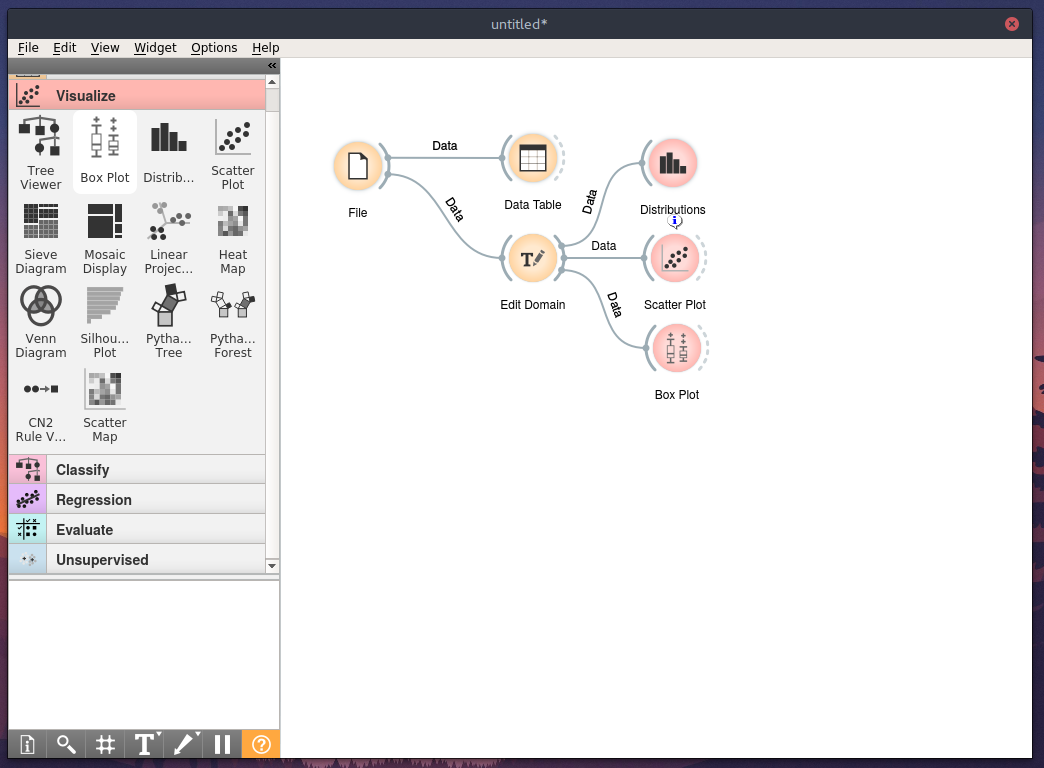

In [4]:
Image('./pic/orange_viz.png')

---

## 4 - Preparing for Prediction

From what you have seen up until now, you can probably make a pretty good prediction if someone survived the Titanic. Say that we offer you this table of people as instances and some of their features:

|        | gender | age | pclass | fare |
| ------ | ------ | --- | ------ | ---- |
| 1      | m      | 51  | higher | 80   |
| 2      | f      | 40  | middle | 60   |
| 3      | m      | 25  | lower  | 10   |

How would you rank the survivability of these three persons?

Now for a bit more complicated one:

|        | gender | age | pclass | fare |
| ------ | ------ | --- | ------ | ---- |
| 1      | m      | 27  | higher | ?    |
| 2      | f      | 21  | middle | ?    |
| 3      | f      | 35  | lower  | ?    |

What would you predict is (about) the fair that these three person bought their tickets for?

---

![imgcatdog](https://computersciencesource.files.wordpress.com/2010/01/graphcdw.png)

### Data Mining

This is exactly the kind of process we want to automate using Data Mining techniques. Up until now, we've used the Titanic data, which is pretty simple --- can be well understood in historical context by humans, and therefore you can at least say something about the likelihood of survival. The fares on the other hand require a bit more of a complex view on the data. You can sort of guess what ballpark the fares would be in based on the `pclass`, but the nuances are harder. These two tasks involve prediction: `survived` - a nominal feature (**classification**), where we have a limited set of options to choose from, and `fare` - a numerical feature (**regression**), where we'd like to be as close to the actual number as possible.

Data Mining is in general the combination of several techniques: 

1. Managing your data.
2. A thorough understanding of its contents and potential.
3. The ability to manually select and alter the data to create useful insights and visualizations.
4. Understanding and applying predictive models that use the full complexity of the data to create even better insights.
5. Making sure these models are correctly evaluated and being able to judge their usefulness.
6. Communicating these results.

This course will mostly focus on 2-5. The practicals will try to train your in 3-5. However, 2 will require your own effort but is the most important step to the success of actually applying 3-5.

---

![imgeth](http://reich-chemistry.wikispaces.com/file/view/ethanol4.JPG/32672417/ethanol4.JPG)

## 5 - Take Home Assignment: Secondary School Alcohol Consumption

Go through the exact same steps of analysis with a new source: the **Student Alcohol Consumption** dataset.

- Information: [context and data](https://www.kaggle.com/uciml/student-alcohol-consumption).
- Data: [math](https://raw.githubusercontent.com/tcsai/social-data-mining/master/data/student-mat.csv), [portugese](https://raw.githubusercontent.com/tcsai/social-data-mining/master/data/student-por.csv).

Submit to the Discussion Board on Blackboard under Take Home Assignment Reports at least:

- Post with **one** interesting, novel finding (with graphics).
- Submit feedback or discussion on **one** of others' findings.

You are allowed to work in pairs. This assignment will **not** be graded.

**Deadline**: 07-02-2017 23:59 